In [1]:
%matplotlib inline
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import sys

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = VGG16(weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.
553467904/553467096 [==============================] - 401s 1us/step


In [12]:
def predict(filename, featuresize):
    img = image.load_img(filename, target_size=(224,224))
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis=0)
    preds = model.predict(preprocess_input(x))
    results = decode_predictions(preds, top=featuresize)[0]
    return results


def showimg(filename, title, i):
    im = Image.open(filename)
    im_list = np.asarray(im)
    plt.subplot(2, 5, i)
    plt.title(title)
    plt.axis('off')
    plt.imshow(im_list)
    
    
   

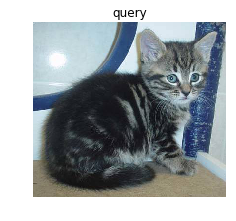

40960/35363 [==================================] - 0s 10us/step
('n02123045', 'tabby', 0.6317545)
('n02123159', 'tiger_cat', 0.11595561)
('n02909870', 'bucket', 0.018666517)
('n02124075', 'Egyptian_cat', 0.01858986)
('n03793489', 'mouse', 0.012174855)
('n03085013', 'computer_keyboard', 0.011474106)
('n04554684', 'washer', 0.010182965)
('n04553703', 'washbasin', 0.009635531)
('n04447861', 'toilet_seat', 0.007438008)
('n03642806', 'laptop', 0.006425761)


In [13]:
filename = "train/train/cat.3591.jpg"
plt.figure(figsize=(20 ,10))
for i in range(1):
    showimg(filename,"query" ,i+1)
plt.show()
results = predict(filename, 10)
for result in results:
    print(result)